In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Criando uma variável para armazenar o caminho do arquivo .CSV
path = 'C:/Users/Thalles/Documents/projeto_coutinho/CSV/heart.csv' 

In [8]:
# Lendo o arquivo CSV
df = pd.read_csv(path)
# Renomeando as colunas
cols = 'idade sexo dor_no_peito pressao_sangue colesterol acucar_sangue eletro max_batimentos exercicios cansaco declive_exercicios veias tálio target'.split()
df.columns = cols

In [9]:
# Verificando os 5 primeiros registros do dataset
df.head()

,idade,sexo,dor_no_peito,pressao_sangue,colesterol,acucar_sangue,eletro,max_batimentos,exercicios,cansaco,declive_exercicios,veias,tálio,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


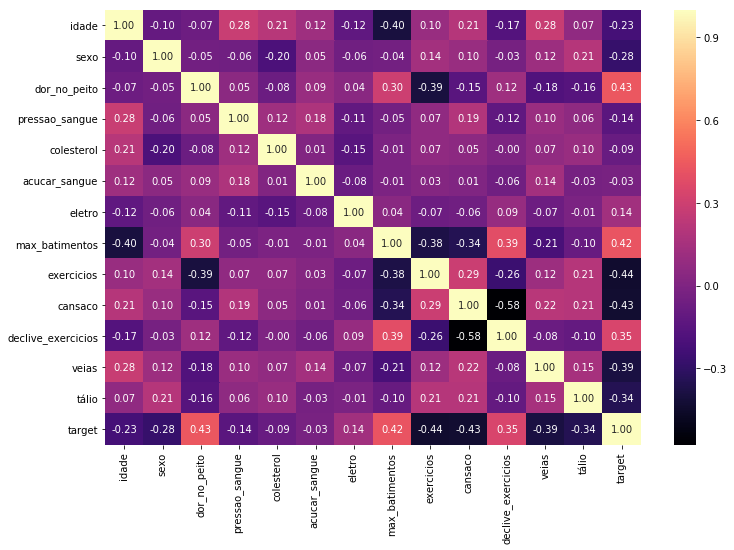

In [10]:
# Verificando o heatmap de correlação entre as colunas
# Para aumentar o tamanho da imagem só mudar o parametro figsize=()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',fmt='.2f');

In [11]:
# Veririficando o número de pessoas que têm doença do coração 
doentes = len(df[df['target']==1])
nao_doentes = len(df[df['target']==0])

print('% de pacientes com doença no coração: {:.2f}%'.format(doentes/len(df['target'])*100))
print('% de pacientes sem doença no coração: {:.2f}%'.format(nao_doentes/len(df['target'])*100))

% de pacientes com doença no coração: 54.46%
% de pacientes sem doença no coração: 45.54%


In [12]:
# Verificando o número de homens e mulheres no dataset
homens = len(df[df['sexo']==1])
mulheres = len(df[df['sexo']==0])

print('% de homens no dataset: {:.2f}%'.format(homens/len(df['sexo'])*100))
print('% de mulheres no dataset: {:.2f}%'.format(mulheres/len(df['sexo'])*100))

% de homens no dataset: 68.32%
% de mulheres no dataset: 31.68%


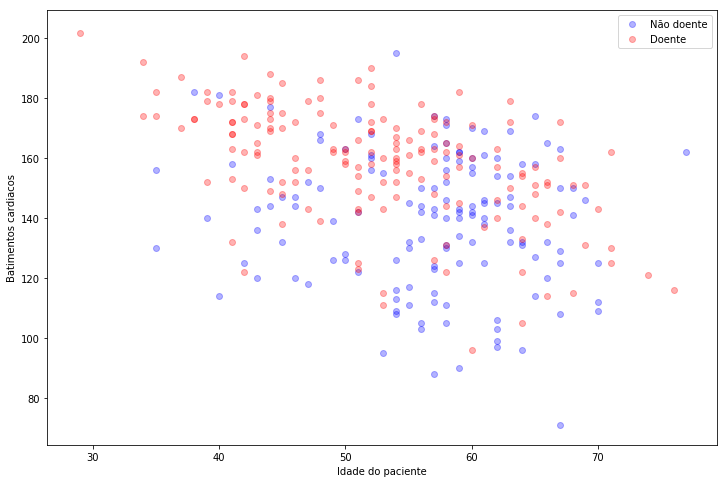

In [13]:
# Plotando a idade vs o batimento cardiaco máximo, em relação as doenças cardiovasculares
plt.figure(figsize=(12,8))
plt.scatter(x=df.idade[df['target']==0], y=df.max_batimentos[df['target']==0],c='blue',alpha=0.3)
plt.scatter(x=df.idade[df['target']==1], y=df.max_batimentos[df['target']==1],c='red',alpha=0.3)
plt.xlabel('Idade do paciente')
plt.ylabel('Batimentos cardiacos')
plt.legend(['Não doente','Doente'])

Text(0.5, 1.0, 'Frequência de doenças cardiacas. Mulheres vs Homens')

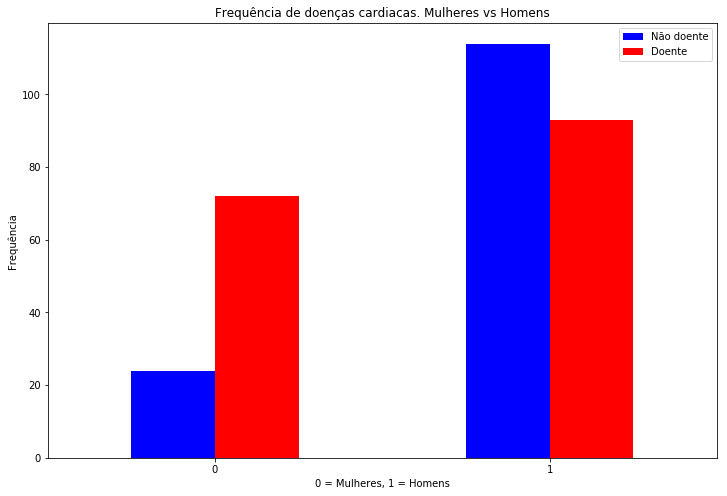

In [14]:
# Plotando a frequência em que homens e mulheres tem doenças cardiovasculares
pd.crosstab(df['sexo'],df['target']).plot(kind="bar",figsize=(12,8),color=['blue','red'])
plt.xticks(rotation=0)
plt.xlabel('0 = Mulheres, 1 = Homens')
plt.ylabel('Frequência')
plt.legend(['Não doente', 'Doente'])
plt.title('Frequência de doenças cardiacas. Mulheres vs Homens')

In [15]:
# X = array contendo as caracteristicas de cada paciente
# y = array contendo a variável preditiva, 0 = não doente, 1 = doente
X = np.array([])
y = np.array([])

X = df.drop('target',axis=1)
y = df['target'].values

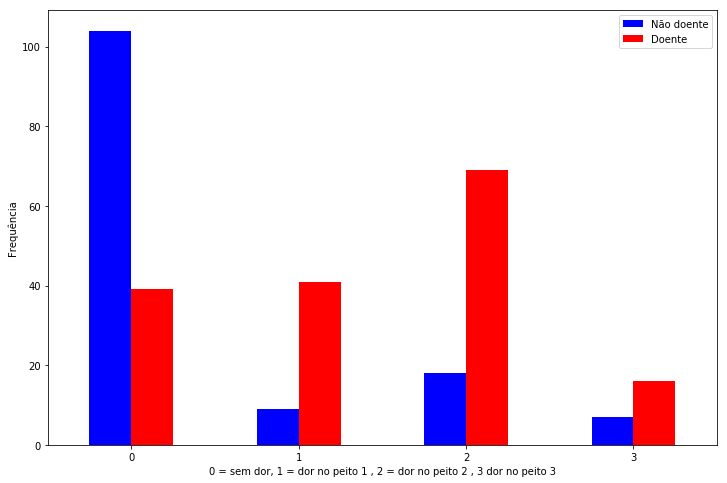

In [25]:
# Plotando a frequência de doença cardiacas de acordo com as dores no peito 
pd.crosstab(df['dor_no_peito'],df['target']).plot(kind="bar",figsize=(12,8),color=['blue','red'])
plt.xticks(rotation=0)
plt.xlabel('0 = sem dor, 1 = dor no peito 1 , 2 = dor no peito 2 , 3 dor no peito 3')
plt.ylabel('Frequência')
plt.legend(['Não doente', 'Doente'])


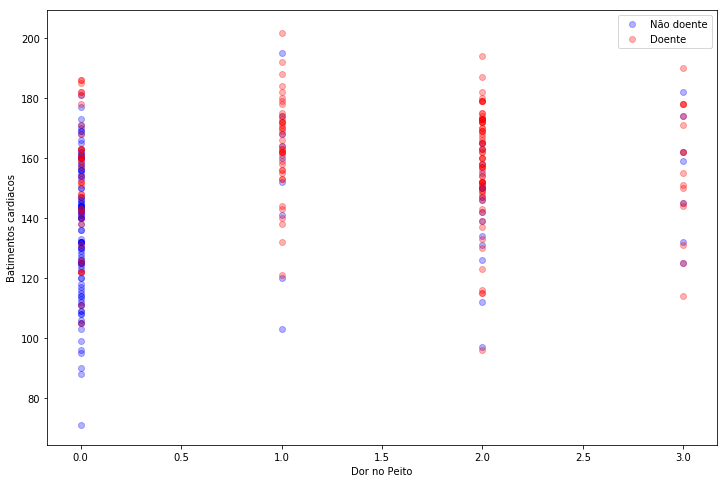

In [17]:
# Plotando a presença de dor no peito vs o batimento cardiaco máximo, em relação as doenças cardiovasculares
plt.figure(figsize=(12,8))
plt.scatter(x=df.dor_no_peito[df['target']==0],y=df.max_batimentos[df['target']==0], c='blue',alpha=0.3)
plt.scatter(x=df.dor_no_peito[df['target']==1],y=df.max_batimentos[df['target']==1], c='red',alpha=0.3)
plt.xlabel('Dor no Peito')
plt.ylabel('Batimentos cardiacos')
plt.legend(['Não doente','Doente'])

In [18]:
# Normalizando os dados antes da inserção nos modelos supervisionados
# transformada normal de características, média = 0, desvio padrão = 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
# Dividindo os dados em 70% para treinamento e 30% para teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
# Função para definir qual a melhor profundidade para o solucionar o problema,
# visando diminuir a diferença entre a acurácia no treino e no teste.
def Tree():
    tree_score_train = []
    tree_score_test  = []
    num_nos = []
    for i in range(1,10):
        tree = DecisionTreeClassifier(max_depth=i)
        num_nos.append(tree.max_depth)
        tree.fit(X_train,y_train)
        tree_score_train.append(tree.score(X_train,y_train))
        tree_score_test.append(tree.score(X_test,y_test))
    return tree_score_train,tree_score_test,num_nos

# Função para encontrar o número de camadas ocultas que melhor resolvem o problema. O número de neurônios é fixo em 100.
# Assim como na arvore de decisão, a função NeuralNetwork() visa encontrar o ponto onde a 
# acurácia no treino e acurácia no teste sejam mais próximas.
def NeuralNetwork():
    model_score_train = []
    model_score_test = []
    cont = 1
    for i in range(1,10):
        i = (100,100)*cont
        cont += 1
        model = MLPClassifier(hidden_layer_sizes=(i),
                                              max_iter=1000,
                                              tol=0,
                                              learning_rate_init=0.0001)
        print('Treinamento da rede neural com {}'.format(model.hidden_layer_sizes))
        model.fit(X_train,y_train)
        print('Salvando as acurácias do treino e teste..\n')
        model_score_train.append(model.score(X_train,y_train))
        model_score_test.append(model.score(X_test,y_test))
    print('\n Rede treinada.')
    return model_score_train,model_score_test

# Função para plotar um gráfico comparativo entre a acurácia no treino e no teste em relação a profundidade da árvore
def Plot_Tree():
    plt.figure(figsize=(12,6))
    plt.plot(num_nos,tree_score_train)
    plt.plot(num_nos,tree_score_test)
    plt.xlabel('Profundidade da árvore')
    plt.ylabel('Acurácia')
    plt.title('Árvore de Decisão - Acurácia treino e teste')
    plt.legend(['Treino','Teste'])
    
# Função para plotar um gráfico comparativo entre acurácia no treino e no teste em relação ao número de camadas ocultas da NN
def Plot_Neural():
    plt.figure(figsize=(12,6))
    plt.plot(num_camadas,model_score_train)
    plt.plot(num_camadas,model_score_test)
    plt.xlabel('Número de camadas ocultas')
    plt.ylabel('Acurácia')
    plt.title('Rede Neural - Acurácia treino e teste')
    plt.legend(['Treino','Teste'])

In [21]:
# Armazenando o retorno da função Tree() em 3 variáveis
# Essa celula executa a arvore de decisão
tree_score_train,tree_score_test,num_nos = Tree()

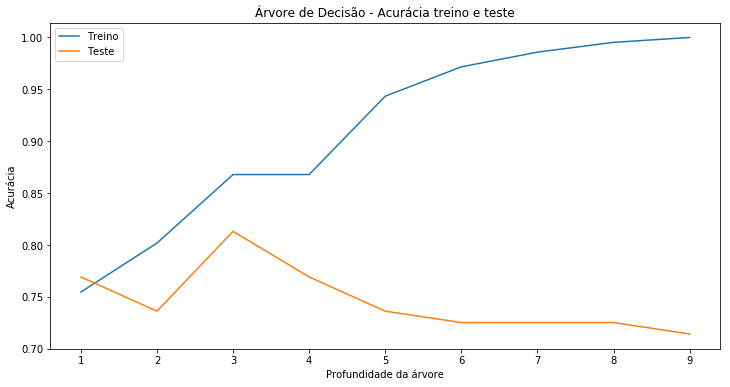

In [24]:
# Chamada da função para plotar o gráfico de acurácias
Plot_Tree()

In [45]:
# num_camadas = variável auxiliar para o plot da rede neural
# Essa celula executa a rede neural (treina e testa)
num_camadas = [2,4,6,8,10,12,14,16,18]
model_score_train,model_score_test = NeuralNetwork()

Treinamento da rede neural com (100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100, 100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Salvando as acurácias do treino e teste..

Treinamento da rede neural com (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)
Salvando as acurácias do treino e teste..


 Rede treinada.


C:\Users\Thalles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


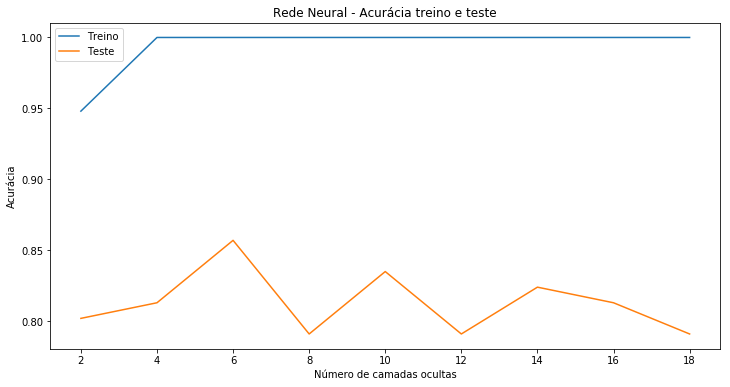

In [46]:
# Chamada da função para plotar o gráfico de acurácias
Plot_Neural()